In [2]:
# Import imbalanced_ensemble
import imbalanced_ensemble as imbens

# Import utilities
from collections import Counter
import sklearn
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import StandardScaler
from imbalanced_ensemble.ensemble.base import sort_dict_by_key
import pandas as pd

# Import plot utilities
import matplotlib.pyplot as plt
from imbalanced_ensemble.utils._plot import plot_2Dprojection_and_cardinality
import seaborn as sns

# Numerical Utils
import pandas as pd
import numpy as np



In [3]:
RANDOM_STATE = 42

In [4]:
# %matplotlib notebook

In [7]:
feats_csv_path = "AC75a-5 DOB 072519_TS_2020-03-23_17_30_04.csv"
df = pd.read_csv(feats_csv_path,index_col=0)
df.head()

,session_basename,time_bin,mean_power_chraw_000_chfreq_001,mean_power_chraw_000_chfreq_003,mean_power_chraw_000_chfreq_005,mean_power_chraw_000_chfreq_007,mean_power_chraw_000_chfreq_009,mean_power_chraw_000_chfreq_011,mean_power_chraw_000_chfreq_013,mean_power_chraw_000_chfreq_015,...,coherence_freq_500.0_chx_001_chy_003,coherence_freq_1000.0_chx_001_chy_003,coherence_freq_0.0_chx_002_chy_003,coherence_freq_15.62_chx_002_chy_003,coherence_freq_31.25_chx_002_chy_003,coherence_freq_62.5_chx_002_chy_003,coherence_freq_125.0_chx_002_chy_003,coherence_freq_250.0_chx_002_chy_003,coherence_freq_500.0_chx_002_chy_003,coherence_freq_1000.0_chx_002_chy_003
0,AC75a-5 DOB 072519_TS_2020-03-23_17_30_04,pre1,56.7156,144.1807,-7.8824,7.6939,24.4479,1.4429,1.4656,-4.8560,...,0.018004,3.650702e-02,0.238529,0.491751,0.472625,0.143596,0.000278,0.029355,0.002549,0.007221
1,AC75a-5 DOB 072519_TS_2020-03-23_17_30_04,pre1,-53.9221,-7.3805,-13.5823,20.5395,-16.4621,-2.7195,-2.8214,2.0746,...,0.012172,7.533822e-04,0.010505,0.427188,0.386341,0.040605,0.019880,0.005875,0.004259,0.000952
2,AC75a-5 DOB 072519_TS_2020-03-23_17_30_04,pre1,4.8714,-6.8261,-5.0513,36.6682,-1.0790,-7.5667,2.0832,13.6164,...,0.010886,2.948796e-03,0.663858,0.857009,0.820433,0.205777,0.003827,0.018094,0.009289,0.000653
3,AC75a-5 DOB 072519_TS_2020-03-23_17_30_04,pre1,-21.5319,-30.1663,-17.5068,3.2853,-39.3127,-10.5423,7.5530,-10.8521,...,0.013975,9.473201e-07,0.906969,0.954968,0.940081,0.486140,0.026860,0.004638,0.009801,0.017705
4,AC75a-5 DOB 072519_TS_2020-03-23_17_30_04,pre1,9.2739,-9.3193,1.0454,-7.7290,-29.2110,7.3796,-2.2477,-38.6640,...,0.003615,5.160409e-03,0.083028,0.208803,0.111817,0.018398,0.002199,0.043590,0.011841,0.004030


In [8]:
# Select features
X = df.drop(["session_basename","time_bin"],axis=1)
# Standardize the features
X = StandardScaler().fit_transform(X)
# Select classes
y = list(df["time_bin"])

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


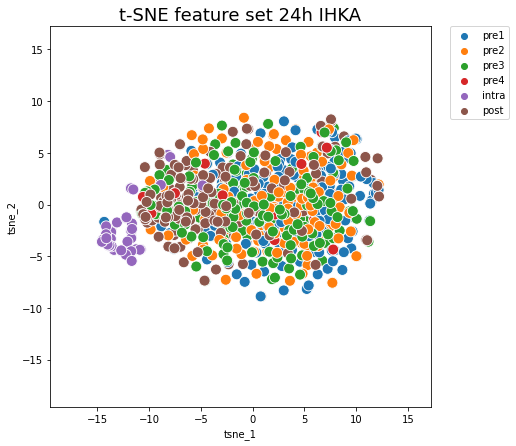

In [9]:
# We want to get TSNE embedding with 2 dimensions
tsne_result = TSNE(2).fit_transform(X)

# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'time_bin': y})
fig, ax = plt.subplots(1,figsize=(7,7))
ax.set_title("t-SNE feature set 24h IHKA",fontsize=18)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='time_bin', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.savefig("t-SNE_feature_set_24h_IHKA.png")
plt.show()



# ### 3D TSNE
# # Import libraries
# from mpl_toolkits import mplot3d

# tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 
#                                "tsne_3": tsne_result[:,2], 'time_bin': y})

# # Creating figure
# fig = plt.figure(figsize = (8, 8))
# ax = plt.axes(projection ="3d")
   
# # Add x, y gridlines
# ax.grid(b = True, color ='grey',
#         linestyle ='-.', linewidth = 0.3,
#         alpha = 0.2)

# # seperate classes
# pre1 = tsne_result_df.loc[tsne_result_df['time_bin'] == "pre_ictal_bin1"]
# pre2 = tsne_result_df.loc[tsne_result_df['time_bin'] == "pre_ictal_bin2"]
# pre3 = tsne_result_df.loc[tsne_result_df['time_bin'] == "pre_ictal_bin3"]
# pre4 = tsne_result_df.loc[tsne_result_df['time_bin'] == "pre_ictal_bin4"]
# intra = tsne_result_df.loc[tsne_result_df['time_bin'] == "intra_ictal_bin"]
# post = tsne_result_df.loc[tsne_result_df['time_bin'] == "post_ictal_bin"]


# # Creating plot
# # sctt = 
# ax.scatter3D(pre1["tsne_1"],
#                     pre1["tsne_2"],
#                     pre1["tsne_3"],label="pre1")
# ax.scatter3D(pre2["tsne_1"],
#                     pre2["tsne_2"],
#                     pre2["tsne_3"],label="pre2")
# ax.scatter3D(pre3["tsne_1"],
#                     pre3["tsne_2"],
#                     pre3["tsne_3"],label="pre3")
# ax.scatter3D(pre4["tsne_1"],
#                     pre4["tsne_2"],
#                     pre4["tsne_3"],label="pre4")
# ax.scatter3D(intra["tsne_1"],
#                     intra["tsne_2"],
#                     intra["tsne_3"],label="intra")
# ax.scatter3D(post["tsne_1"],
#                     post["tsne_2"],
#                     post["tsne_3"],label="post")

# #                     color='label')
 
# plt.title("TSNE 3d 24h mouse seizure data")
# ax.set_xlabel('X-axis', fontweight ='bold')
# ax.set_ylabel('Y-axis', fontweight ='bold')
# ax.set_zlabel('Z-axis', fontweight ='bold')

# ax.legend()

# # show plot
# plt.show()


## Dimensionality reduction

In [12]:
pca = PCA(n_components=15)
Xpca = pca.fit_transform(X)
kpca = KernelPCA(n_components=15)
Xkpca = kpca.fit_transform(X)
class_dic = {"pre1":0,
            "pre2":1,
            "pre3":2,
            "pre4":3,
            "intra":4,
            "post":5}

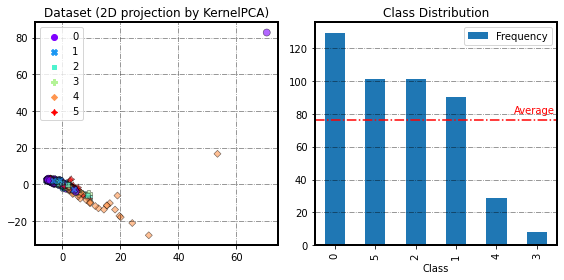

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y,
                                                      test_size=0.4,
                                                      stratify=y,
                                                      random_state=RANDOM_STATE)
# Visualize the training dataset
fig = plot_2Dprojection_and_cardinality(X_train, [class_dic[i] for i in y_train], figsize=(8, 4))
plt.show()


## Using ensemble classifiers in `imbalanced_ensemble`

Take `SelfPacedEnsembleClassifier` as example

In [28]:
from imbalanced_ensemble.ensemble import SelfPacedEnsembleClassifier as SPE


In [29]:
# Initialize an SelfPacedEnsembleClassifier
clf = SPE(random_state=RANDOM_STATE)

# Train an SelfPacedEnsembleClassifier
clf.fit(X_train, y_train,train_verbose=True)

# Make predictions
y_pred_proba = clf.predict_proba(X_valid)
y_pred = clf.predict(X_valid)

# Evaluate
balanced_acc_score = sklearn.metrics.balanced_accuracy_score(y_valid, y_pred)
print (f'SPE: ensemble of {clf.n_estimators} {clf.base_estimator_}')
print ('Validation Balanced Accuracy: {:.3f}'.format(balanced_acc_score))


┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃             ┃                                                                             ┃            Data: train             ┃
┃ #Estimators ┃                             Class Distribution                              ┃               Metric               ┃
┃             ┃                                                                             ┃  acc    balanced_acc   weighted_f1 ┃
┣━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃      1      ┃     {'intra': 8, 'post': 8, 'pre1': 8, 'pre2': 8, 'pre3': 8, 'pre4': 8}     ┃ 0.437      0.580          0.442    ┃
┃      5      ┃     {'intra': 8, 'post': 8, 'pre1': 8, 'pre2': 8, 'pre3': 8, 'pre4': 8}     ┃ 0.533      0.668          0.521    ┃
┃     10      ┃     {'intra': 8, 'post': 8, 'pre1': 8, 'pre2': 8, 'pre3': 8, 'pre4'